### Imputing missing values using median and Linear Regression cum EDA
### Normalisation and Dimentionality Reduction
### Model Training
### Picklig and Prediction

### 1.Imputing missing values using median and Linear Regression cum EDA

Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

In [21]:
data2018=pd.read_csv(r"C:/Users/Admin/Downloads/Water Quality Data .csv")

Exploring Data

In [22]:
data2018.shape

(374, 26)

In [23]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               374 non-null    int64  
 1   district          374 non-null    object 
 2   mandal            374 non-null    object 
 3   village           374 non-null    object 
 4   lat_gis           374 non-null    float64
 5   long_gis          374 non-null    float64
 6   gwl               371 non-null    float64
 7   season            374 non-null    object 
 8   pH                374 non-null    float64
 9   E.C               374 non-null    int64  
 10  TDS               374 non-null    float64
 11  CO3               374 non-null    int64  
 12  HCO3              374 non-null    float64
 13  Cl                374 non-null    int64  
 14  F                 374 non-null    float64
 15  NO3               374 non-null    float64
 16  SO4               374 non-null    float64
 1

Check for Null values

In [24]:
data2018.isnull().sum()

sno                 0
district            0
mandal              0
village             0
lat_gis             0
long_gis            0
gwl                 3
season              0
pH                  0
E.C                 0
TDS                 0
CO3                 0
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
Classification.1    0
dtype: int64

Renaming Features

Imputing groundwater level missing values by median grouped by Districts 

In [26]:
median_groundwater_by_district_2018 = data2018.groupby('district')['gwl'].median()


In [32]:
def impute_missing_with_median(row):


    data2018['gwl'] = data2018.apply(impute_missing_with_median, axis=1)


There were 160 missing values in feature CO3. Lets see for how many districts the values are missing with the total districts

Values of CO3 are completely missing for Districts Nizamabad, Kamareddy, Khammam, Vikarabad, Siddipet. 
For others out of total count only 2-3 are present. 
Out of 364 rows for 2019, 160 are missing which is43.95%
and out of 1106 ( 3 datasets combined) ,160 are missing which is 14.46%

We will check the corelation of this feature within 2018 and also with whole 3 datasets combined. If no significant relation is
found lets remove the feature

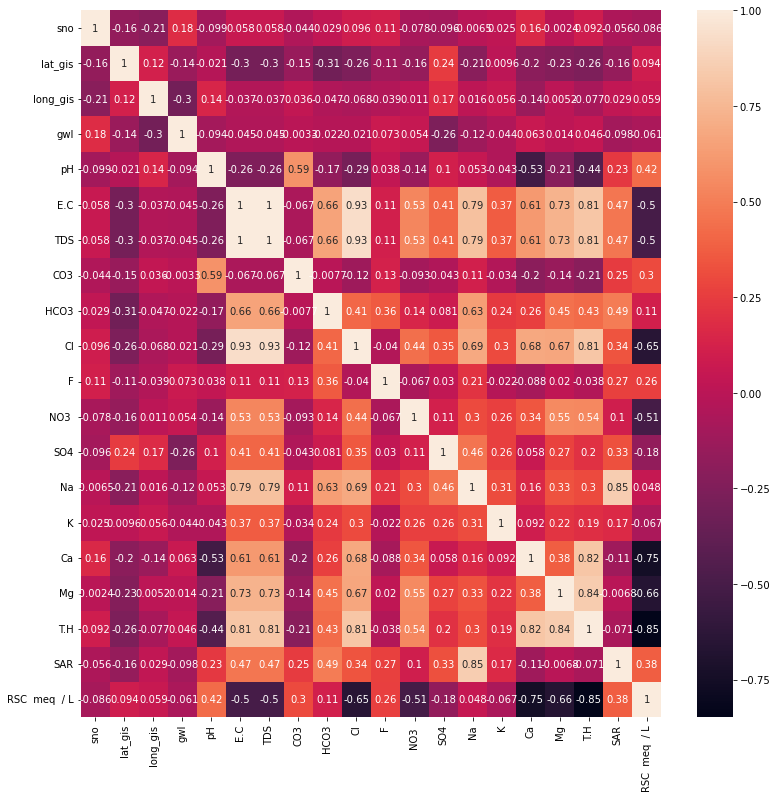

In [34]:
correl_2018=data2018.corr()
plt.figure(figsize=(13,13))
sns.heatmap(correl_201,annot=True)
plt.show()

CO3 is only moderately correlated with only pH values within data 0.6, complete data 0.58

Imputing missing values using a correlated feature as a predictor involves using the correlated feature to predict 
the missing values in the column with missing data. This can be achieved through a simple linear regression model
or any other appropriate imputation technique that leverages the relationship between the correlated features.

Using Linear Regression

In [37]:
#Getting non missing values of noth columns i.e., pH and CO3 from 2019
df_missing=data2018[['pH','CO3']]
df_subset = df_missing.dropna(subset=['CO3', 'pH'])

In [38]:
df_subset.shape

(374, 2)

In [39]:
#taking X and y for prediction
X_train = df_subset['pH'].values.reshape(-1, 1)
y_train = df_subset['CO3'].values

In [40]:
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
df_missing.shape

(374, 2)

In [43]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pH      374 non-null    float64
 1   CO3     374 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 6.0 KB


In [44]:
data2018['CO3']=df_missing['CO3'] #putting predicted CO3 values in data2019

In [45]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               374 non-null    int64  
 1   district          374 non-null    object 
 2   mandal            374 non-null    object 
 3   village           374 non-null    object 
 4   lat_gis           374 non-null    float64
 5   long_gis          374 non-null    float64
 6   gwl               371 non-null    float64
 7   season            374 non-null    object 
 8   pH                374 non-null    float64
 9   E.C               374 non-null    int64  
 10  TDS               374 non-null    float64
 11  CO3               374 non-null    int64  
 12  HCO3              374 non-null    float64
 13  Cl                374 non-null    int64  
 14  F                 374 non-null    float64
 15  NO3               374 non-null    float64
 16  SO4               374 non-null    float64
 1

In [50]:
#redefining water_data
water_data=data2018
water_data.loc[261,'pH']=8.05
water_data['pH']=water_data.loc[:,'pH'].astype(float)

In [51]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sno               374 non-null    int64  
 1   district          374 non-null    object 
 2   mandal            374 non-null    object 
 3   village           374 non-null    object 
 4   lat_gis           374 non-null    float64
 5   long_gis          374 non-null    float64
 6   gwl               371 non-null    float64
 7   season            374 non-null    object 
 8   pH                374 non-null    float64
 9   E.C               374 non-null    int64  
 10  TDS               374 non-null    float64
 11  CO3               374 non-null    int64  
 12  HCO3              374 non-null    float64
 13  Cl                374 non-null    int64  
 14  F                 374 non-null    float64
 15  NO3               374 non-null    float64
 16  SO4               374 non-null    float64
 1

Visualisations

<AxesSubplot:>

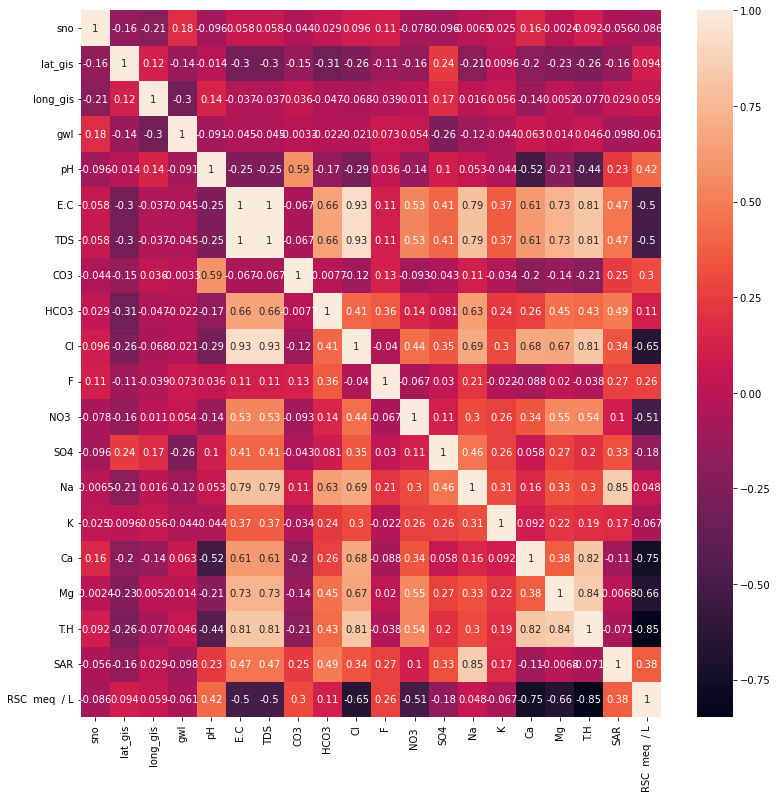

In [52]:
#visualise the correltaion after imputing


cor=water_data.corr()
plt.figure(figsize=(13,13))
sns.heatmap(cor,annot=True)

More Visualisations

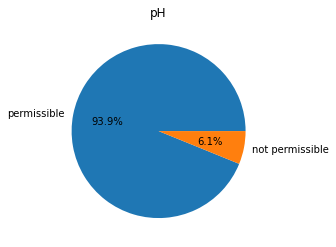

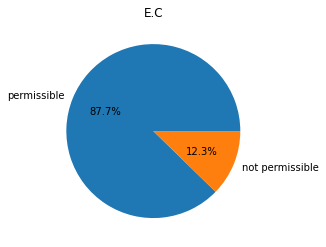

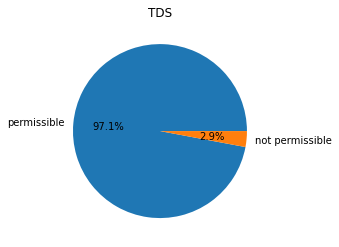

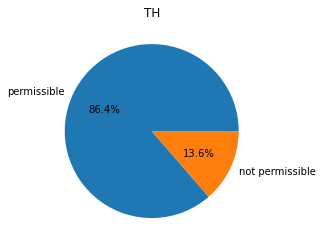

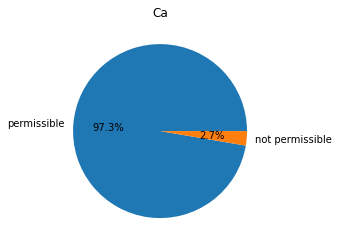

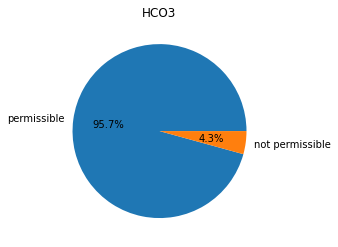

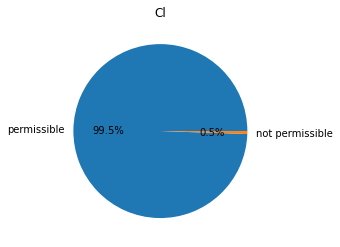

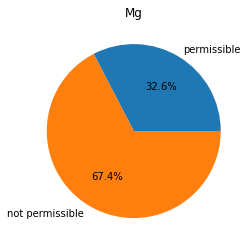

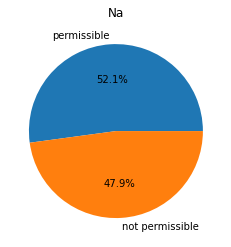

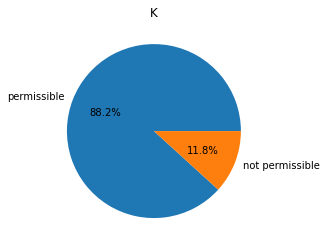

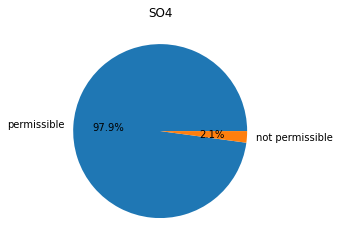

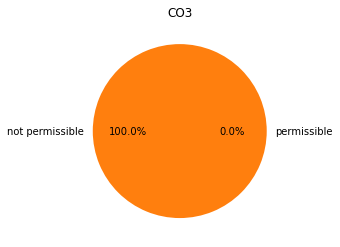

In [53]:
#pie charts. 
#According Standards there are limits to what extent the chemical level in water is safe
#By pie charts lets find out, of all the samples how much % of water samples are safe


def counting(column,ll,ul):
    """ll- lower limit, ul- upper limit"""    
    c=0
    c1=0
    for i in column:
        if i>ll and i<ul:
            c=c+1
        else:
             c1=c1+1
    return c,c1
def plotting(l,tit):
    N=["permissible","not permissible"]
    plt.pie(l,labels=N,autopct="%0.1f%%")
    plt.title(tit)
    plt.show()

l=counting(water_data["pH"],6,8.5)
plotting(l,"pH")
l1=counting(water_data["E.C"],500,3000)
plotting(l1,"E.C")
l2=counting(water_data["TDS"],0,2000)
plotting(l2,"TDS")
l3=counting(water_data["T.H"],0,600)
plotting(l3,"TH")
l4=counting(water_data["Ca"],0,200)
plotting(l4,"Ca")
l5=counting(water_data["HCO3"],100,800)
plotting(l5,"HCO3")
l6=counting(water_data["Cl"],0,1000)
plotting(l6,"Cl")
l7=counting(water_data['Mg'],1,30)
plotting(l7,"Mg")
l8=counting(water_data['Na'],0,100)
plotting(l8,"Na")
l9=counting(water_data['K'],0,12)
plotting(l9,"K")
l10=counting(water_data['SO4'],0,200)
plotting(l10,"SO4")
l11=counting(water_data['CO3'],1.32,17.60)
plotting(l11,"CO3")
plt.show()

In [49]:
clm_tovis=['gwl', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4',
       'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'RSC  meq  / L']

for i in clm_tovis:
    plt.figure(figsize=(4,4))
    sns.histplot(water_data[i],kde=True)
    plt.show()

NameError: name 'water_data' is not defined

<Figure size 288x288 with 0 Axes>

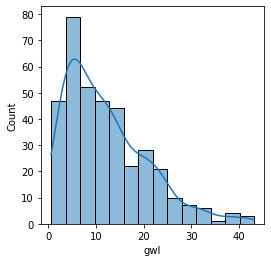

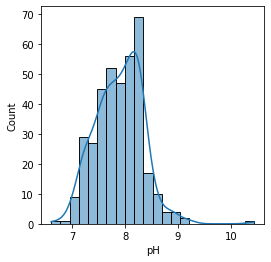

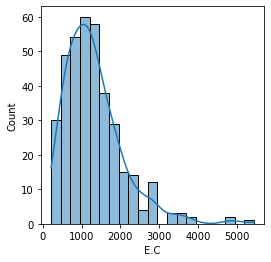

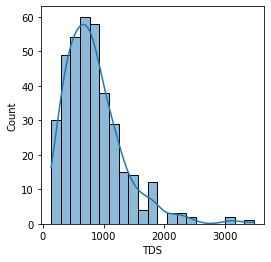

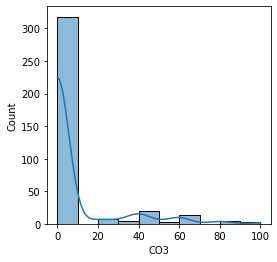

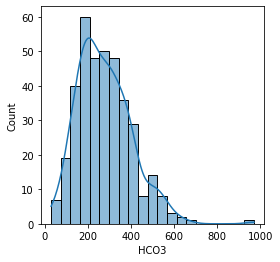

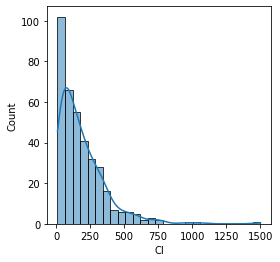

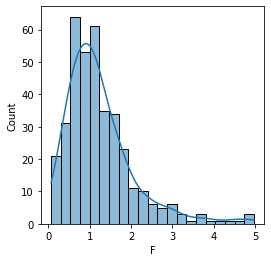

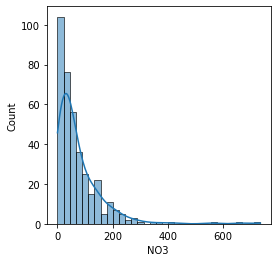

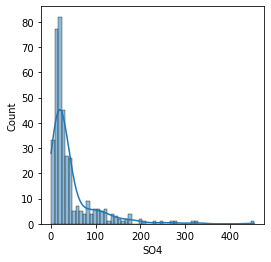

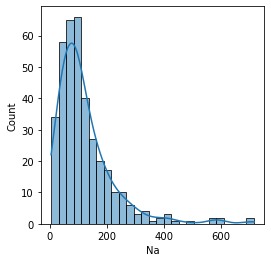

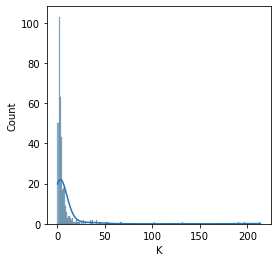

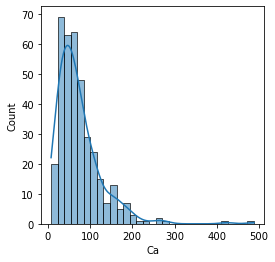

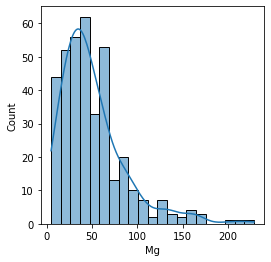

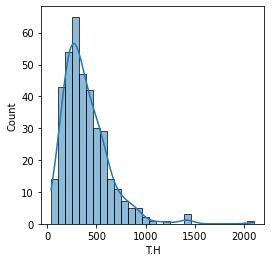

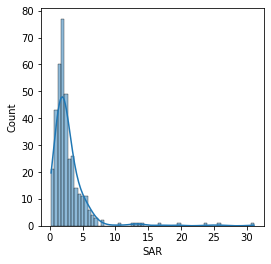

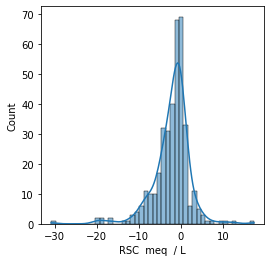

In [54]:
clm_tovis=['gwl', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4',
       'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'RSC  meq  / L']

for i in clm_tovis:
    plt.figure(figsize=(4,4))
    sns.histplot(water_data[i],kde=True)
    plt.show()

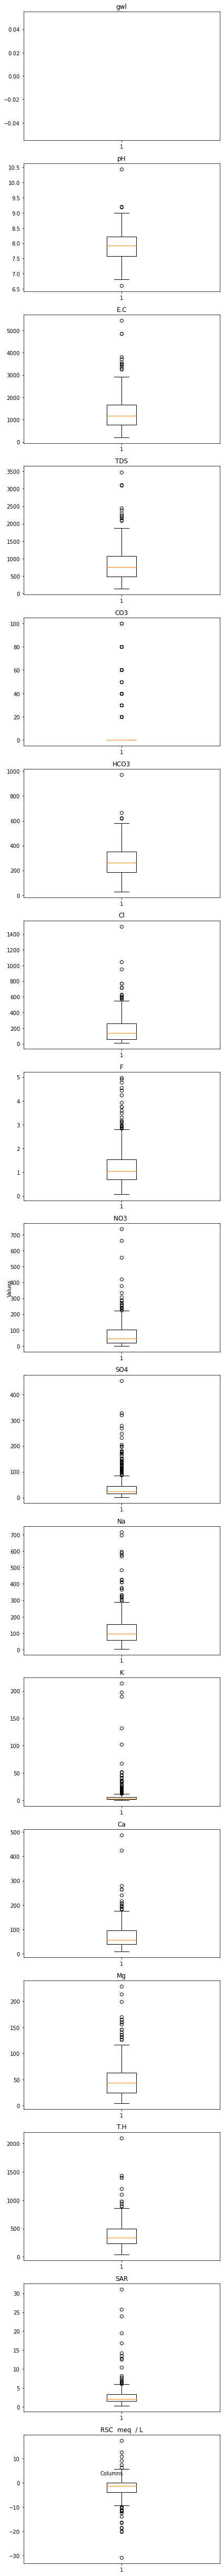

In [55]:
#Boxplots

num_columns=17
fig, axs = plt.subplots(num_columns, 1, figsize=(6, 4*num_columns))  # Adjust figsize as needed

# Loop through each column and create a box plot in its respective subplot
for i, column_name in enumerate(clm_tovis):
    axs[i].boxplot(water_data[column_name])
    axs[i].set_title(column_name)

# Add a common x-axis label to all subplots (optional)
fig.text(0.5, 0.04, 'Columns', ha='center')

# Add a common y-axis label to all subplots (optional)
fig.text(0.04, 0.5, 'Values', va='center', rotation='vertical')

plt.tight_layout()  # To prevent overlapping titles and labels
plt.show()

In [56]:
water_data.columns

Index(['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis', 'gwl',
       'season', 'pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4',
       'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'Classification', 'RSC  meq  / L',
       'Classification.1'],
      dtype='object')

In [57]:
# to train data for prediction of water quality for crops

Columns_to_drop=['sno', 'district', 'mandal', 'village', 'lat_gis', 'long_gis','season','RSC  meq  / L','Classification.1']
Water_data=water_data.drop(columns=Columns_to_drop)

In [58]:
Water_data.head()

,gwl,pH,E.C,TDS,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,T.H,SAR,Classification
0,5.09,8.28,745,476.80,0,220.0,60,0.44,42.276818,46.0,49.0,4.0,48,38.896,279.934211,1.273328,C2S1
1,5.10,8.29,921,589.44,0,230.0,80,0.56,100.659091,68.0,42.0,5.0,56,63.206,399.893092,0.913166,C3S1
2,4.98,7.69,510,326.40,0,200.0,30,0.66,41.471545,44.0,45.0,2.0,24,38.896,219.934211,1.319284,C2S1
3,5.75,8.09,422,270.08,0,160.0,10,0.58,10.669864,35.0,27.0,1.0,32,19.448,159.967105,0.928155,C2S1
4,2.15,8.21,2321,1485.44,0,300.0,340,2.56,128.843636,280.0,298.0,5.0,56,92.378,519.843750,5.682664,C4S2


### 2.Normalisation, Dimentionality Reduction 

In [59]:
#Check the distribution of 'classification'
Water_data['Classification'].value_counts()

C3S1    234
C2S1     88
C4S1     21
C4S2     15
C4S4      5
C3S2      4
C1S1      2
C3S3      2
C4S3      1
C3S4      1
C2S2      1
Name: Classification, dtype: int64

The distribution is uneven. So need to Use stratified method for tarining and testing. 
O.G and OG are not defined will remove them.
C3S4 and C2S2 are only 1 which caused lot of error under Stratified method. For now remove them too

In [60]:
Water_data = Water_data[~Water_data['Classification'].isin(['C3S4', 'C2S2','OG','O.G'])]

In [62]:
X=Water_data.drop(['Classification'],axis=1)
y=Water_data['Classification']

#Splitting train test by startified

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
#Normalising the data, as for dimentionality reduction we need normalised data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [64]:
#PCA
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
pca.explained_variance_ratio_

In [ ]:
sum(pca.explained_variance_ratio_)

### 3.Model Training

In [65]:
#Label Encoding the Target feature

encoder = LabelEncoder()

# Fit and transform the training target variable 'y_train'
y_train_encoded = encoder.fit_transform(y_train)

# Transform the test target variable 'y_test'
y_test_encoded = encoder.transform(y_test)


ValueError: y contains previously unseen labels: 'C4S3'

In [ ]:
# 5 fold cross validation

models=[xgb.XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8),
        RandomForestClassifier(n_estimators=50,random_state=42)]

num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and evaluate models

def model_evaluation(model):
    
    
    fold_accuracies = []        
    models = []
    
    for fold, (train_index, val_index) in enumerate(skf.split(X_train_pca, y_train_encoded)):
        X_train_fold, X_val_fold = X_train_pca[train_index], X_train_pca[val_index]
        y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]
    
    
        model = model  # Replace with your chosen model and set the appropriate hyperparameters
        model.fit(X_train_fold, y_train_fold)

    # Add the trained model to the list for later evaluation
        models.append(model)

    # Step 6: Make predictions on the current fold's validation data
        y_pred_fold = model.predict(X_val_fold)

    # Step 7: Calculate accuracy for the current fold
        accuracy = accuracy_score(y_val_fold, y_pred_fold)
        fold_accuracies.append(accuracy)
        print(f"Fold {fold+1} - Accuracy: {accuracy:.4f}")

# Calculate and print the mean accuracy and standard deviation across all folds
    mean_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    std_accuracy = np.std(fold_accuracies)
    print(f"\nMean Cross-Validation Accuracy: {mean_accuracy:.4f} ± {std_accuracy:.4f}")

In [ ]:
for i in models:
    model_evaluation(i)

In [ ]:
#best model = XGBoost

best_model = xgb.XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)  # Replace with the selected best model
best_model.fit(X_train_pca, y_train_encoded)

# Step 8: Evaluate the final model on the test set

y_test_pred = best_model.predict(X_test_pca)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"\nFinal Model - Test Accuracy: {test_accuracy:.4f}")

### 4.Pickling and Prediction

In [ ]:
import pickle

with open('WaterQualityClassification.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
encoded_classes = encoder.classes_

for i, class_label in enumerate(encoded_classes):
    print(f"Class Label: {class_label} - Encoded Value: {i}")

In [ ]:
def prediction(data):
    with open('WaterQualityClassification.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
       
    new_data=np.array(data)
    new_data_normalised=scaler.transform(new_data.reshape(1,-1))
    new_data_pca=pca.transform(new_data_normalised)
    predicted_class = loaded_model.predict(new_data_pca)
    
    encoded_class=predicted_class
    original_class=encoder.inverse_transform(encoded_class)
    
    Class_Description={'C1S1':"Low salinity and low sodium waters are good for irrigation and can be used with most crops with no restriction on use on most of the soils. ",
                   'C2S1':"Medium salinity and low sodium waters are good for irrigation and can be used on all most all soils with little danger of development of harmful levels of exchangeable sodium if a moderate amount of leaching occurs. Crops can be grown without any special consideration for salinity control. ",
                   'C3S1':"The high salinity and low sodium waters require good drainage. Crops with good salt tolerance should be selected.",
                  'C3S2':"The high salinity and medium sodium waters require good drainage and can be used on coarse - textured or organic soils having good permeability. ",
                  'C3S3':"These high salinity and high sodium waters require special soil management, good drainage, high leaching and organic matter additions. Gypsum amendments make feasible the use of these waters. ",
                  'C4S1':"Very high salinity and low sodium waters are not suitable for irrigation unless the soil must be permeable and drainage must be adequate. Irrigation waters must be applied in excess to provide considerable leaching. Salt tolerant crops must be selected. ",
                  'C4S2':"Very high salinity and medium sodium waters are not suitable for irrigation on fine textured soils and low leaching conditions and can be used for irrigation on coarse textured or organic soils having good permeability. ",
                  'C4S3':"Very high salinity and high sodium waters produce harmful levels of exchangeable sodium in most soils and will require special soil management, good drainage, high leaching, and organic matter additions. The Gypsum amendment makes feasible the use of these waters. ",
                  'C4S4':"Very high salinity and very high sodium waters are generally unsuitable for irrigation purposes. These are sodium chloride types of water and can cause sodium hazards. It can be used on coarse-textured soils with very good drainage for very high salt tolerant crops. Gypsum amendments make feasible the use of these waters. "
                  }
    
    if original_class[0] in Class_Description:
        print(original_class[0]+" "+Class_Description[original_class[0]])

In [ ]:
test_data=[5.66,8.02,420,275.3,0.0,153.3,12,0.55,11.200,37,25,1.0,33.0,20.5,160.3,0.938]
prediction(test_data)